# Titanic Classification Project

![](titanic.jpg)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Data Preprocessing
We need to prepare the data for modeling by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.



In [2]:
dataset = pd.read_csv("titanic_train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
total_rows, total_columns = dataset.shape

print(f'Total rows: {total_rows}')
print(f'Total columns: {total_columns}')

Total rows: 891
Total columns: 12


In [9]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dataset[['Age','Cabin']]

,Age,Cabin
0,22.0,NaN
1,38.0,C85
2,26.0,NaN
3,35.0,C123
4,35.0,NaN
...,...,...
886,27.0,NaN
887,19.0,B42
888,NaN,NaN
889,26.0,C148


In [11]:
dataset2 = dataset.copy()

In [12]:
# Fill missing 'Age' with the mean of the column
dataset2['Age'].fillna(dataset2['Age'].mean(), inplace=True)

# Fill missing 'Cabin' with a constant value, e.g., 'Unknown'
dataset2['Cabin'].fillna('Unknown', inplace=True)

# Fill missing 'Embarked' with the mode of the column (most frequent value)
dataset2['Embarked'].fillna(dataset2['Embarked'].mode()[0], inplace=True)

# Verify the changes
dataset2.isna().sum()

C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_3096\921354857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset2['Age'].fillna(dataset2['Age'].mean(), inplace=True)
C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_3096\921354857.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
dataset2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


# Encoding categorical variables

In [14]:
label_encoder = LabelEncoder()
dataset2['Sex'] = label_encoder.fit_transform(dataset2['Sex'])
dataset2['Embarked'] = label_encoder.fit_transform(dataset2['Embarked'])
dataset2['Cabin'] = label_encoder.fit_transform(dataset2['Cabin'])

# Dropping non-essential columns
dataset2.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Splitting the data into training and testing sets
X = dataset2.drop('Survived', axis=1)
y = dataset2['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Graphical representation for better Undestanding

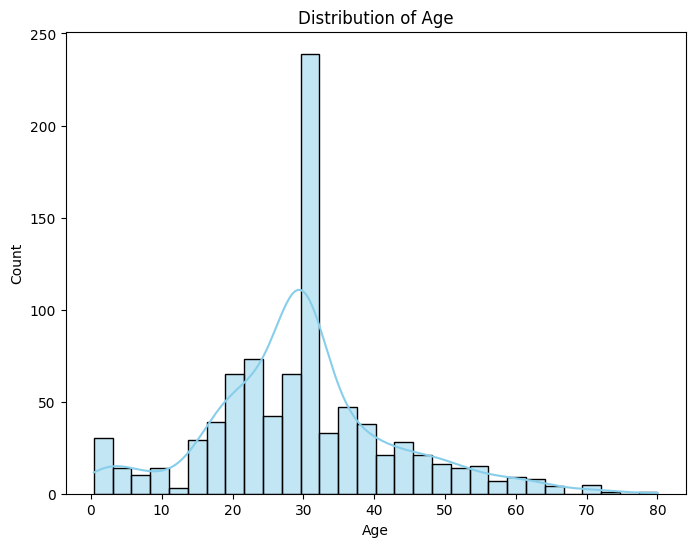

In [15]:
# Histogram of Numerical Variable (Age Distribution)
plt.figure(figsize=(8, 6))
sns.histplot(dataset2['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

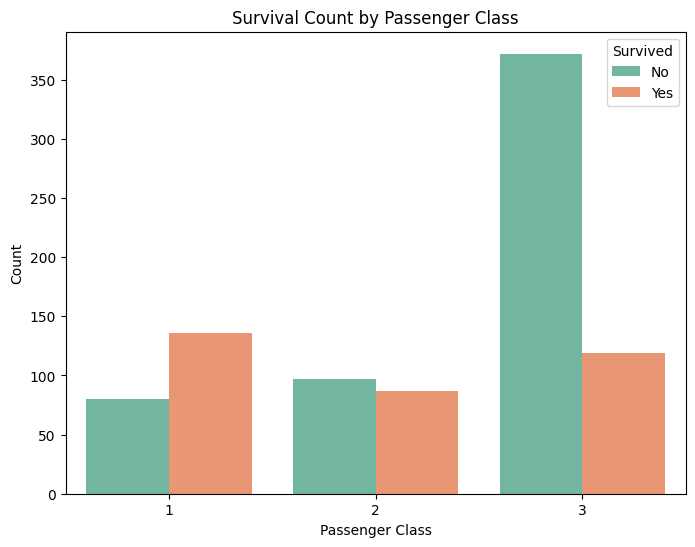

In [16]:
# Bar Plot (Survival Count by Passenger Class)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=dataset2, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

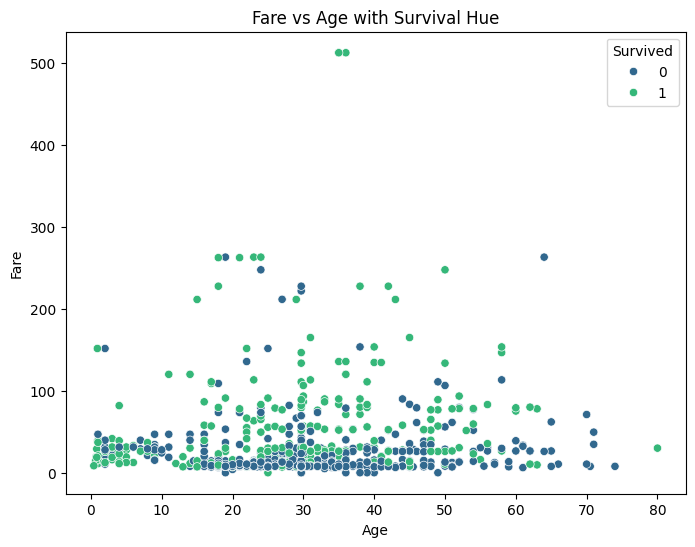

In [17]:
# Scatter Plot (Fare vs Age with Survival Hue)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dataset2, palette='viridis')
plt.title('Fare vs Age with Survival Hue')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_3096\461178611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=dataset2, palette='Set3')


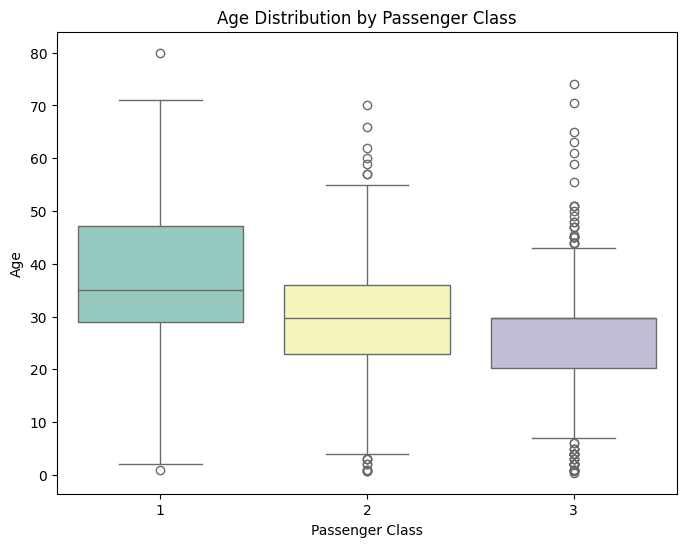

In [18]:
# Example 4: Box Plot (Age Distribution by Passenger Class)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=dataset2, palette='Set3')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

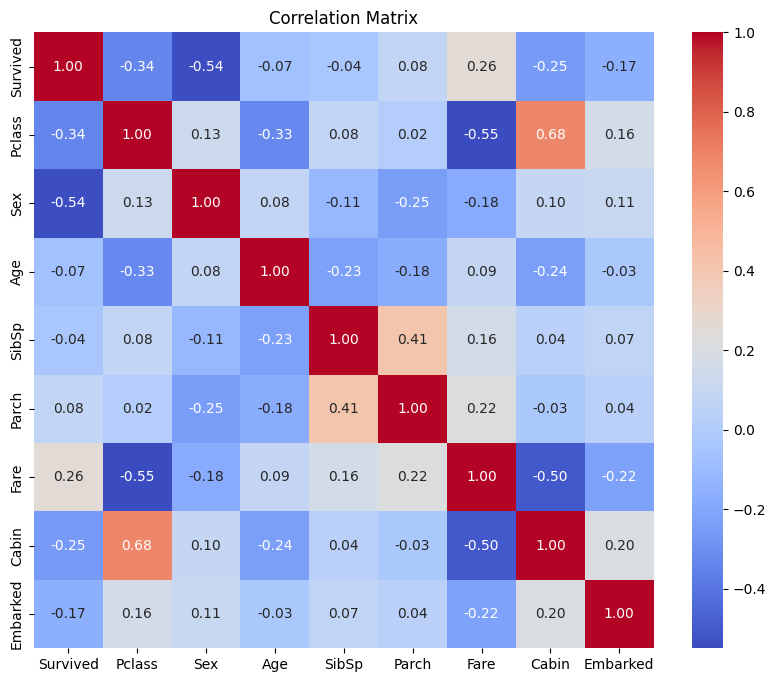

In [19]:
# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 8))
corr = dataset2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

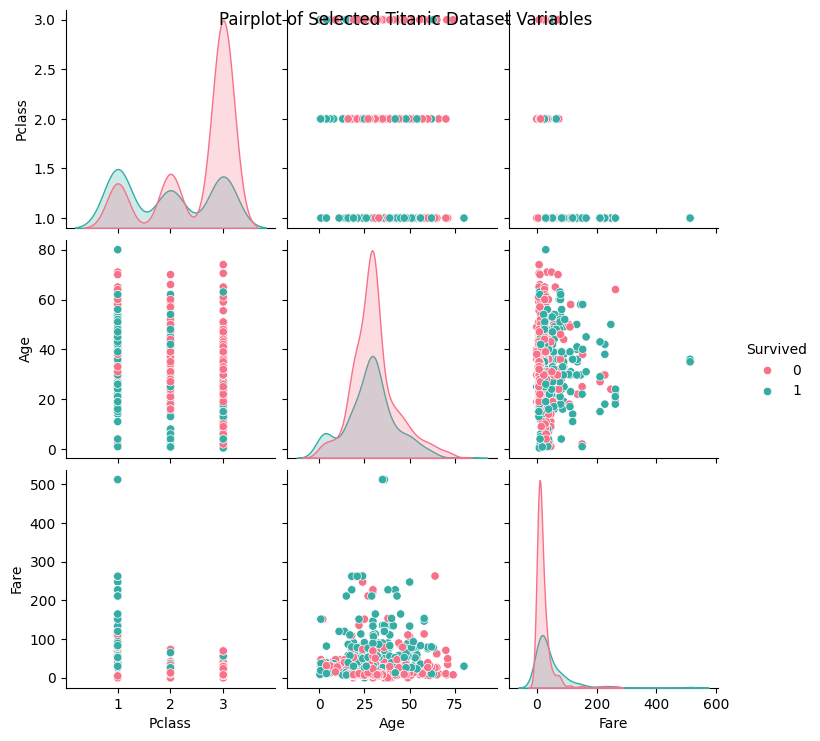

In [20]:
# Pairplot (Selected Variables)
selected_vars = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(dataset2[selected_vars], hue='Survived', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Selected Titanic Dataset Variables')
plt.show()

## Explanation:
1 Histogram: Visualizes the distribution of a single numerical variable (Age) using a histogram with a kernel density estimate (KDE).

2 Bar Plot: Shows the count of survival outcomes (Survived) by passenger class (Pclass) using a bar plot with different hues for survival status.

3 Scatter Plot: Displays the relationship between two numerical variables (Age and Fare) with survival status indicated by color.

4 Box Plot: Illustrates the distribution of ages across different passenger classes using a box plot, which shows median, quartiles, and potential outliers.

5 Heatmap: Represents the correlation matrix of numerical variables in the dataset, with annotations for clarity.

6 Pairplot: Shows pairwise relationships between selected variables (Survived, Pclass, Age, Fare) with histograms on the diagonal and scatter plots otherwise, differentiated by survival status.

These graphs used in data science for exploratory data analysis (EDA), insights generation, and visualization of relationships within datasets

# 2. Model Training
We'll train a RandomForestClassifier as it's robust and performs well on a variety of datasets.

In [21]:
# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 3. Model Evaluation
Evaluate the model's performance on the test set.

In [22]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# 4. Making Predictions
You can use the trained model to make predictions on new data.

In [23]:
# Example new data point
new_data = pd.DataFrame({
    'Pclass': [2],
    'Sex': [1],  # 1 for male, 0 for female
    'Age': [30],
    'SibSp': [10],
    'Parch': [10],
    'Fare': [10.15],
    'Cabin': [0],  # encoded value for 'Unknown'
    'Embarked': [1]  # encoded value for 'S'
})

# Predicting survival
prediction = model.predict(new_data)
# Using if-else condition to print a user-friendly message
if prediction[0] == 1:
    print('Prediction: The person is predicted to survive.')
else:
    print('Prediction: The person is predicted not to survive.')

Prediction: The person is predicted to survive.


In [24]:
accuracy = accuracy_score(y_test, y_pred)*100

In [25]:
print(f'Accuracy: {accuracy:.2f} %')

Accuracy: 81.01 %


# Summary
what this code does:

# Data Preprocessing:

Fill missing values for 'Age', 'Cabin', and 'Embarked'.
Encode categorical variables 'Sex', 'Embarked', and 'Cabin' using LabelEncoder.
Drop non-essential columns: 'PassengerId', 'Name', and 'Ticket'.

# Model Training:

Split the data into training and testing sets.
Train a RandomForestClassifier with the training data.

# Model Evaluation:

Predict the labels for the test set.
Calculate the accuracy, confusion matrix, and classification report.

After running this code, the output will display the model's accuracy, confusion matrix, and classification report, which provides insights into the performance of the model.